# Project Final - Optimización de Ganancias en un Portafolio
## - *Temas de Optimización Linear*
## - *Pontificia Universidad Javeriana*

### - ***Autores:*** David Santiago Barreto Mora, Jose Carlos Molano del Oro

---

# Objetivo


Se usaran las 10 acciones más populares en el mercado bursatil NASDAQ, el cual provee históricos para todas sus acciones cotizadas. El histórico de cada acción puede ser encontrada en la siguiente página:

https://www.nasdaq.com/market-activity/stocks/screener

Con las 10 Acciones más populares siendo:
1. **Apple (APPL)**
2. **Starbucks (SBUX)**
3. **Microsoft (MSFT)**
4. **Cisco Systems (CSCO)**
5. **Qualcomm incorporated (QCOM)**
6. **Meta (Meta)**
7. **Amazon.com (AMZN)**
8. **Tesla (TSLA)**
9. **Advanced Micro Devices (AMD)**
10. **Netflix (NFLX)**


Para cada histórico de cada acción, se tienen las siguientes columnas:

- **Date:** Esta columna representa la fecha para la que se registran los datos de stock. Suele tener el formato AAAA-MM-DD (año-mes-día).

- **Close/Last:** Esta columna representa el precio de la acción al cierre del día de negociación. Es el precio más reciente al que se negociaron las acciones ese día.

- **Volume:** Esta columna representa el número de acciones que se negociaron ese día. Es una medida de la liquidez de la acción.

- **Open:** Esta columna representa el precio de la acción en la apertura del día de negociación. Es el primer precio al que se negociaron las acciones ese día.

- **High:** Esta columna representa el precio más alto que alcanzó la acción durante el día de negociación.

- **Low:** Esta columna representa el precio más bajo que alcanzó la acción durante el día de negociación.


Usaremos librería esenciales de ciencia de datos para visualizar y descubrir comportamiento de los datos.

In [386]:
# Importamos librerías esenciales para la ciencia de datos
import pandas as pd
import numpy as np

# Visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns


In [387]:
# Creamos un dataframe para cada uno de los CSV's
amd_df = pd.read_csv("data/AMD_HistoricalData_5years.csv")
amzn_df = pd.read_csv("data/AMZN_HistoricalData_5years.csv")
apple_df = pd.read_csv("data/APPL_HistoricalData_5years.csv")
csco_df = pd.read_csv("data/CSCO_HistoricalData_5years.csv")
meta_df = pd.read_csv("data/META_HistoricalData_5years.csv")
msft_df = pd.read_csv("data/MSFT_HistoricalData_5years.csv")
nflx_df = pd.read_csv("data/NFLX_HistoricalData_5years.csv")
qcom_df = pd.read_csv("data/QCOM_HistoricalData_5years.csv")
sbux_df = pd.read_csv("data/SBUX_HistoricalData_5years.csv")
tsla_df = pd.read_csv("data/TSLA_HistoricalData_5years.csv")

In [388]:
# Imprimimos las primeras columnas del cada dataframe
print("\n AMD: \n", amd_df.head())
print("\n AMZN: \n", amzn_df.head())
print("\n APPLE: \n", apple_df.head())
print("\n CISCO: \n", csco_df.head())
print("\n META: \n", meta_df.head())
print("\n MICROSOFT: \n", msft_df.head())
print("\n NETFLIX: \n", nflx_df.head())
print("\n QUALCOMM: \n", qcom_df.head())
print("\n STARBUCKS: \n", sbux_df.head())
print("\n TESLA: \n", tsla_df.head())


 AMD: 
          Date Close/Last    Volume     Open      High        Low
0  11/17/2023    $120.62  38538700  $119.64   $121.49    $118.82
1  11/16/2023    $119.83  49661870  $117.20  $120.726    $116.41
2  11/15/2023    $118.00  59555590  $120.54   $120.59  $116.8701
3  11/14/2023    $119.88  61017450  $119.70   $122.11    $119.22
4  11/13/2023    $116.79  46741890  $118.34   $118.68    $116.00

 AMZN: 
          Date Close/Last    Volume     Open     High       Low
0  11/17/2023    $145.18  49678440  $142.66  $145.23  $142.545
1  11/16/2023    $142.83  49653510  $140.91  $143.32   $139.52
2  11/15/2023    $143.20  63875720  $147.06  $147.29   $142.59
3  11/14/2023    $145.80  56674550  $145.00  $147.26   $144.68
4  11/13/2023    $142.59  35680570  $142.08  $143.23   $140.67

 APPLE: 
          Date Close/Last    Volume      Open     High      Low
0  11/17/2023    $189.69  50941400   $190.25  $190.38  $188.57
1  11/16/2023    $189.71  54412920   $189.57  $190.96  $188.65
2  11/15/2023

In [389]:
# Imprimos los tipos de datos de cada columna de todos los dataframes
print("\n AMD: \n", amd_df.dtypes)
print("\n AMZN: \n", amzn_df.dtypes)
print("\n APPLE: \n", apple_df.dtypes)
print("\n CSCO: \n", csco_df.dtypes)
print("\n META: \n", meta_df.dtypes)
print("\n MSFT: \n", msft_df.dtypes)
print("\n NFLX: \n", nflx_df.dtypes)
print("\n QCOM: \n", qcom_df.dtypes)
print("\n SBUX: \n", sbux_df.dtypes)
print("\n TSLA: \n", tsla_df.dtypes)



 AMD: 
 Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

 AMZN: 
 Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

 APPLE: 
 Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

 CSCO: 
 Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

 META: 
 Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

 MSFT: 
 Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

 NFLX: 
 Date          object
Close/Last    object
Volume         int64
Open          object
High  

Podemos ver que todos los dataframes tienen la mismas columnas e incluso los mismos tipos de datos. Varios campos que deberían ser númericos son de tipo "object"debido a que tienen el signo del dolar dentro el campo del mismo valor. La homogeneidad en todos los dataframes nos facilitará la manipulación de datos.

A continuación ponemos todos los dataframes en un arreglo para facilitar la limpieza de datos.

In [390]:
# Ponemos todos los dataframes en una lista
dataframes = [amd_df, amzn_df, apple_df, csco_df, meta_df, msft_df, nflx_df, qcom_df, sbux_df, tsla_df]

# Dada que todos los dataframes tienen las mismas columnas y tipos de datos, podemos modificarlos iterativamentet
# Modificaremos las columnsa "Close/Last", "Open", "High", "Low" a tipo float
for df in dataframes:
    df["Close/Last"] = df["Close/Last"].str.replace("$", "").astype(float)
    df["Open"] = df["Open"].str.replace("$", "").astype(float)
    df["High"] = df["High"].str.replace("$", "").astype(float)
    df["Low"] = df["Low"].str.replace("$", "").astype(float)

In [391]:
# Imprimimos los tipos de datos de cada columna de todos los dataframes para verificar que se hayan modificado
print("\n AMD: \n", amd_df.dtypes)
print("\n AMZN: \n", amzn_df.dtypes)
print("\n APPLE: \n", apple_df.dtypes)
print("\n CSCO: \n", csco_df.dtypes)
print("\n META: \n", meta_df.dtypes)
print("\n MSFT: \n", msft_df.dtypes)
print("\n NFLX: \n", nflx_df.dtypes)
print("\n QCOM: \n", qcom_df.dtypes)
print("\n SBUX: \n", sbux_df.dtypes)
print("\n TSLA: \n", tsla_df.dtypes)


 AMD: 
 Date           object
Close/Last    float64
Volume          int64
Open          float64
High          float64
Low           float64
dtype: object

 AMZN: 
 Date           object
Close/Last    float64
Volume          int64
Open          float64
High          float64
Low           float64
dtype: object

 APPLE: 
 Date           object
Close/Last    float64
Volume          int64
Open          float64
High          float64
Low           float64
dtype: object

 CSCO: 
 Date           object
Close/Last    float64
Volume          int64
Open          float64
High          float64
Low           float64
dtype: object

 META: 
 Date           object
Close/Last    float64
Volume          int64
Open          float64
High          float64
Low           float64
dtype: object

 MSFT: 
 Date           object
Close/Last    float64
Volume          int64
Open          float64
High          float64
Low           float64
dtype: object

 NFLX: 
 Date           object
Close/Last    float64
Volume    

In [392]:
# Imprimimos de nuevo los primeros 5 valores de cada dataframe para verificar que se hayan modificado
print("\n AMD: \n", amd_df.head())
print("\n AMZN: \n", amzn_df.head())
print("\n APPLE: \n", apple_df.head())
print("\n CSCO: \n", csco_df.head())
print("\n META: \n", meta_df.head())
print("\n MSFT: \n", msft_df.head())
print("\n NFLX: \n", nflx_df.head())
print("\n QCOM: \n", qcom_df.head())
print("\n SBUX: \n", sbux_df.head())
print("\n TSLA: \n", tsla_df.head())


 AMD: 
          Date  Close/Last    Volume    Open    High     Low
0  11/17/2023     120.620  38538700 119.640 121.490 118.820
1  11/16/2023     119.830  49661870 117.200 120.726 116.410
2  11/15/2023     118.000  59555590 120.540 120.590 116.870
3  11/14/2023     119.880  61017450 119.700 122.110 119.220
4  11/13/2023     116.790  46741890 118.340 118.680 116.000

 AMZN: 
          Date  Close/Last    Volume    Open    High     Low
0  11/17/2023     145.180  49678440 142.660 145.230 142.545
1  11/16/2023     142.830  49653510 140.910 143.320 139.520
2  11/15/2023     143.200  63875720 147.060 147.290 142.590
3  11/14/2023     145.800  56674550 145.000 147.260 144.680
4  11/13/2023     142.590  35680570 142.080 143.230 140.670

 APPLE: 
          Date  Close/Last    Volume    Open    High     Low
0  11/17/2023     189.690  50941400 190.250 190.380 188.570
1  11/16/2023     189.710  54412920 189.570 190.960 188.650
2  11/15/2023     188.010  53790500 187.845 189.500 187.780
3  11/14/2

Ahora que los tipos de datos son adecuados, revisamos los datos en busca de datos nulos o incompletos.

In [393]:
# Buscamos datos nulos o incompleto en cada dataframe
print("\n AMD: \n", amd_df.isnull().sum())
print("\n AMZN: \n", amzn_df.isnull().sum())
print("\n APPLE: \n", apple_df.isnull().sum())
print("\n CSCO: \n", csco_df.isnull().sum())
print("\n META: \n", meta_df.isnull().sum())
print("\n MSFT: \n", msft_df.isnull().sum())
print("\n NFLX: \n", nflx_df.isnull().sum())
print("\n QCOM: \n", qcom_df.isnull().sum())
print("\n SBUX: \n", sbux_df.isnull().sum())
print("\n TSLA: \n", tsla_df.isnull().sum())



 AMD: 
 Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

 AMZN: 
 Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

 APPLE: 
 Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

 CSCO: 
 Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

 META: 
 Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

 MSFT: 
 Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

 NFLX: 
 Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

 QCOM: 
 Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

 SBUX: 
 Date          0
Close/Last    0
Volume

Todos los dataframes tienen los datos completos. No es necesario remover o hacer algún proceso de imputación de datos. Ahora usamos el método "describe" de pandas para obtener una descripción estadística de nuestros datos.


In [394]:
# Usamos la funcion describe para obtener estadisticas de cada dataframe
amd_df.describe()

,Close/Last,Volume,Open,High,Low
count,1258.000,1258.000,1258.000,1258.000,1258.000
mean,75.579,67381568.013,75.577,77.117,73.991
std,33.039,29984374.450,33.083,33.763,32.316
min,16.650,16705910.000,16.520,17.220,16.030
25%,48.220,45790345.000,48.235,49.260,47.158
50%,81.290,59061300.000,81.110,82.350,79.335
75%,99.388,82878580.000,98.752,101.638,97.123
max,161.910,225394100.000,163.280,164.460,156.100


In [395]:
# Descripción de los datos de Amazon
amzn_df.describe()

,Close/Last,Volume,Open,High,Low
count,1258.000,1258.000,1258.000,1258.000,1258.000
mean,126.080,78139509.428,126.122,127.685,124.447
std,31.877,35456098.558,31.964,32.246,31.591
min,67.198,17626740.000,67.300,69.802,65.350
25%,94.583,54492342.500,94.557,95.553,93.317
50%,124.645,67195900.000,124.120,126.246,122.928
75%,158.094,92365065.000,158.347,159.931,156.225
max,186.571,311345600.000,187.200,188.654,184.840


In [396]:
# Descripción de los datos de Apple
apple_df.describe()


,Close/Last,Volume,Open,High,Low
count,1258.000,1258.000,1258.000,1258.000,1258.000
mean,119.669,104561799.547,119.550,120.952,118.255
std,46.793,53834147.146,46.761,47.229,46.323
min,35.547,31346600.000,35.995,36.430,35.500
25%,71.954,69682170.000,71.188,72.437,70.623
50%,132.265,90239540.000,132.395,133.980,130.855
75%,156.417,123008200.000,155.812,157.820,153.885
max,196.450,426884800.000,196.235,198.230,195.280


In [397]:
# Descripción de los datos de Cisco
csco_df.describe()

,Close/Last,Volume,Open,High,Low
count,1258.000,1258.000,1258.000,1258.000,1258.000
mean,49.160,21150582.103,49.143,49.607,48.682
std,5.538,10148938.655,5.531,5.504,5.569
min,33.200,5720538.000,33.230,35.820,32.400
25%,45.240,15436305.000,45.185,45.650,44.761
50%,48.660,18560915.000,48.670,49.124,48.258
75%,53.470,23209040.000,53.490,53.930,53.140
max,63.960,106928300.000,64.040,64.285,63.550


In [398]:
# Descripción de los datos de Meta
meta_df.describe()

,Close/Last,Volume,Open,High,Low
count,1258.000,1258.000,1258.000,1258.000,1258.000
mean,231.309,23726246.413,231.165,234.510,228.045
std,69.142,15614986.823,69.204,69.732,68.529
min,88.910,6046273.000,90.080,90.458,88.090
25%,178.295,15056752.500,178.457,180.585,176.670
50%,214.380,20035220.000,213.476,216.774,211.135
75%,290.462,27737120.000,289.960,295.788,286.220
max,382.180,232316600.000,381.680,384.330,378.810


In [399]:
# Descripción de los datos de Microsoft
msft_df.describe()

,Close/Last,Volume,Open,High,Low
count,1258.000,1258.000,1258.000,1258.000,1258.000
mean,230.270,29843107.466,230.192,232.619,227.706
std,71.862,12681919.305,71.867,72.530,71.175
min,94.130,8989150.000,95.140,97.970,93.960
25%,163.745,21866957.500,163.487,165.876,162.270
50%,240.400,26656845.000,239.470,242.875,237.080
75%,288.430,33816417.500,288.524,290.437,284.928
max,376.170,110945000.000,373.610,376.350,370.180


In [400]:
# Descripción de los datos de Netflix
nflx_df.describe()

,Close/Last,Volume,Open,High,Low
count,1258.000,1258.000,1258.000,1258.000,1258.000
mean,397.287,7387418.804,397.188,403.380,390.930
std,116.234,6463244.563,116.548,117.216,115.439
min,166.370,1143952.000,163.960,172.062,162.710
25%,315.118,4135173.000,311.472,316.805,306.624
50%,374.040,5784845.500,374.320,380.256,367.320
75%,494.558,8449208.750,495.000,502.992,487.775
max,691.690,133387500.000,692.350,700.989,686.090


In [401]:
# Descripción de los datos de Qualcomm
qcom_df.describe()

,Close/Last,Volume,Open,High,Low
count,1258.000,1258.000,1258.000,1258.000,1258.000
mean,113.926,10173897.838,113.919,115.570,112.259
std,33.232,7316652.612,33.266,33.782,32.670
min,49.400,2120165.000,49.580,49.800,49.100
25%,85.252,6675462.000,85.170,86.357,84.245
50%,118.815,8480588.000,118.540,120.540,117.100
75%,137.007,11550057.500,137.125,138.889,135.113
max,189.280,155953900.000,190.304,193.580,185.185


In [402]:
# Descripción de los datos de Starbucks
sbux_df.describe()

,Close/Last,Volume,Open,High,Low
count,1258.000,1258.000,1258.000,1258.000,1258.000
mean,92.210,7919541.700,92.200,93.112,91.266
std,14.856,4087312.109,14.837,14.838,14.873
min,56.330,1847770.000,55.550,57.440,50.020
25%,79.633,5330372.500,79.880,81.277,78.758
50%,91.250,6765572.000,91.310,92.098,90.433
75%,104.290,9097224.250,104.157,105.207,103.100
max,126.060,30199660.000,126.080,126.320,124.810


In [403]:
# Descripción de los datos de Tesla
tsla_df.describe()

,Close/Last,Volume,Open,High,Low
count,1258.000,1258.000,1258.000,1258.000,1258.000
mean,165.948,133954673.223,166.004,169.875,161.918
std,109.863,85594204.338,110.012,112.480,107.310
min,11.931,29401677.000,12.073,12.445,11.800
25%,37.689,79784403.750,37.935,38.541,36.973
50%,194.150,109312992.500,193.943,198.600,189.440
75%,250.921,158520900.000,250.038,255.332,244.388
max,409.970,914080943.000,411.470,414.497,405.667


Nada más observando estas tablas, podemos ver que hay hay clara variabilidad en los valores de cada acción. Hay acciones con máximos mucho más grandes (Por ejemplo, Tesla, Netflix o Meta), las cuales también suelen tener una desviación estándar más grande. Podiamos entender estas acciones como más "volátiles", de igual forma que hay otras acciones mucho más estables y claramente establecidas.

A continuación visualizamos todas estas propiedas claves de cada acción. Haremos varias visualizaciones sobre la columna "Close/Last" ya los precios de cierre son un indicativo final del precio de la acción. Además, también visualizaremos los datos de la columna "Volumen" para ver cuales acciones suelen ser más intercambiadas.

Iniciamos viendo el valor máximo registrado de cada acción :


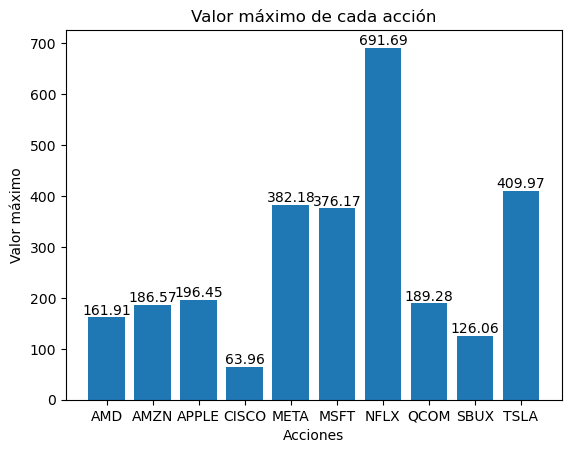

In [404]:
# Visualizamos el valor máximo de cada acción, de la columna "Close/Last" en una gráfica de barras. Cada barra representa el valor máximo de cada acción

# Creamos una lista con los valores máximos de cada acción
max_values = [amd_df["Close/Last"].max(), amzn_df["Close/Last"].max(), apple_df["Close/Last"].max(), csco_df["Close/Last"].max(), meta_df["Close/Last"].max(), msft_df["Close/Last"].max(), nflx_df["Close/Last"].max(), qcom_df["Close/Last"].max(), sbux_df["Close/Last"].max(), tsla_df["Close/Last"].max()]

# Creamos una lista con los nombres de cada acción
companies = ["AMD", "AMZN", "APPLE", "CISCO", "META", "MSFT", "NFLX", "QCOM", "SBUX", "TSLA"]

# Creamos una gráfica de barras con los valores máximos de cada acción.
bars = plt.bar(companies, max_values)

# Add the numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom', ha='center')  # ha: horizontal alignment

plt.title("Valor máximo de cada acción")
plt.xlabel("Acciones")
plt.ylabel("Valor máximo")
plt.show()

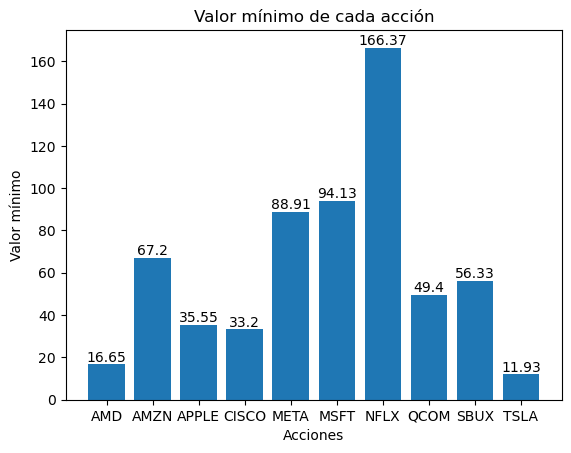

In [405]:
# Visualizamos el valor mínimo de cada acción, de la columna "Close/Last" en una gráfica de barras.

# Creamos una lista con los valores mínimos de cada acción
min_values = [amd_df["Close/Last"].min(), amzn_df["Close/Last"].min(), apple_df["Close/Last"].min(), csco_df["Close/Last"].min(), meta_df["Close/Last"].min(), msft_df["Close/Last"].min(), nflx_df["Close/Last"].min(), qcom_df["Close/Last"].min(), sbux_df["Close/Last"].min(), tsla_df["Close/Last"].min()]
# Creamos una gráfica de barras con los valores mínimos de cada acción.
bars = plt.bar(companies, min_values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom', ha='center')  # ha: horizontal alignment

plt.title("Valor mínimo de cada acción")
plt.xlabel("Acciones")
plt.ylabel("Valor mínimo")
plt.show()


Estas gráficas resultan curiosas por el claro outlier del valor máximo de la acción de netflix. Además es interesante como el valor máximo de acciones muy populares como Apple y Amazon estan por de bajo de muchas otras. 

Dado que el máximo puede ser muy variable, debido a que puede ser posiblemente afectado por noticias y factores externos, ahora vemos el valor *promedio* de la acción.

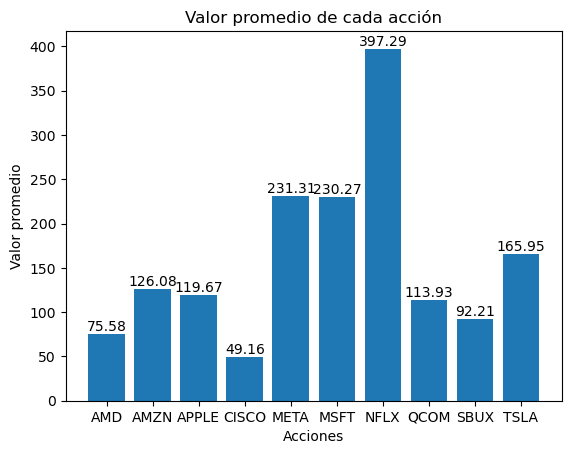

In [406]:
# Visualizamos el valor promedio de cada acción, de la columna "Close/Last" en una gráfica de barras.

# Creamos una lista con los valores promedio de cada acción
mean_values = [amd_df["Close/Last"].mean(), amzn_df["Close/Last"].mean(), apple_df["Close/Last"].mean(), csco_df["Close/Last"].mean(), meta_df["Close/Last"].mean(), msft_df["Close/Last"].mean(), nflx_df["Close/Last"].mean(), qcom_df["Close/Last"].mean(), sbux_df["Close/Last"].mean(), tsla_df["Close/Last"].mean()]
# Creamos una gráfica de barras con los valores promedio de cada acción.
bars = plt.bar(companies, mean_values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom', ha='center')  # ha: horizontal alignment

plt.title("Valor promedio de cada acción")
plt.xlabel("Acciones")
plt.ylabel("Valor promedio")
plt.show()




Varios de los comportamientos excibidos en esta gráfica pueden ser confirmados al ver la desviación estándard de cada acción.

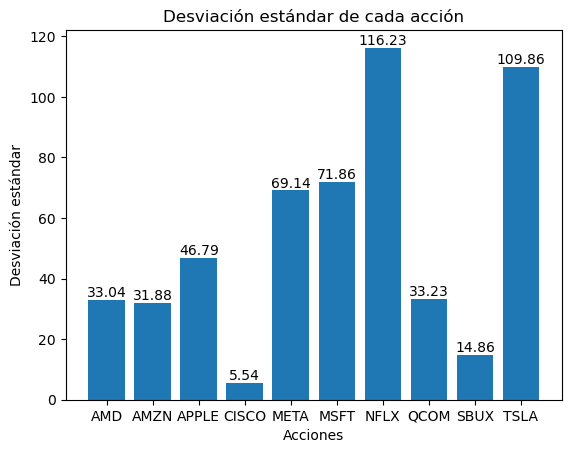

In [407]:
# Visualizamos la desviación estándar de cada acción, de la columna "Close/Last" en una gráfica de barras.

# Creamos una lista con las desviaciones estándar de cada acción
std_values = [amd_df["Close/Last"].std(), amzn_df["Close/Last"].std(), apple_df["Close/Last"].std(), csco_df["Close/Last"].std(), meta_df["Close/Last"].std(), msft_df["Close/Last"].std(), nflx_df["Close/Last"].std(), qcom_df["Close/Last"].std(), sbux_df["Close/Last"].std(), tsla_df["Close/Last"].std()]
# Creamos una gráfica de barras con las desviaciones estándar de cada acción.
bars = plt.bar(companies, std_values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom', ha='center')  # ha: horizontal alignment

plt.title("Desviación estándar de cada acción")
plt.xlabel("Acciones")
plt.ylabel("Desviación estándar")
plt.show()


Después de observar todas las gráficas, podemos confirma nuestra asumpción hecha anteriormente. Las acciones con valor más alto suelen ser también las que tienen una mayor volatilidad (deaviación estándard). De estas cifrás, además, también podemos optimizar nuestro portafolio en base a la **gestión de riesgo**, basandonos en que tan variable es el precio de una acción.

Antes de iniciar el proceso de optimización, también vemos el promedio histórico mensual de cada acción en para desde el 2018.


In [408]:
# Creamos copias de todos los dataframes, dado que para las visualizaciones los modificaremos.
amd_df1 = amd_df.copy()
amzn_df1 = amzn_df.copy()
apple_df1 = apple_df.copy()
csco_df1 = csco_df.copy()
meta_df1 = meta_df.copy()
msft_df1 = msft_df.copy()
nflx_df1 = nflx_df.copy()
qcom_df1 = qcom_df.copy()
sbux_df1 = sbux_df.copy()
tsla_df1 = tsla_df.copy()

amd_df2 = amd_df.copy()
amzn_df2 = amzn_df.copy()
apple_df2 = apple_df.copy()
csco_df2 = csco_df.copy()
meta_df2 = meta_df.copy()
msft_df2 = msft_df.copy()
nflx_df2 = nflx_df.copy()
qcom_df2 = qcom_df.copy()
sbux_df2 = sbux_df.copy()
tsla_df2 = tsla_df.copy()
dataframes2 = [amd_df2, amzn_df2, apple_df2, csco_df2, meta_df2, msft_df2, nflx_df2, qcom_df2, sbux_df2, tsla_df2]


In [409]:
# Convertimos los datos del dataframe de AMD
df = amd_df  

# Convertimos la columna 'Date' a un tipo de dato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Establecemos la columna 'Date' como el índice del dataframe
df.set_index('Date', inplace=True)

# Remuestreamos los datos a un promedio mensual
monthly_mean = df['Close/Last'].resample('M').mean()

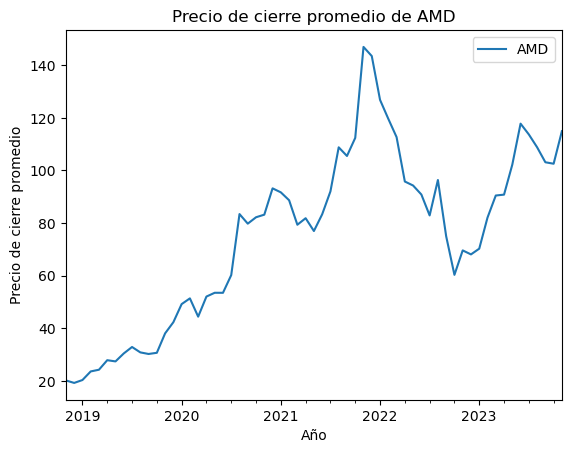

In [410]:
# Graficamos los datos históricos de cierre de AMD
monthly_mean.plot(label='AMD')  

plt.title("Precio de cierre promedio de AMD")  
plt.xlabel("Año")
plt.ylabel("Precio de cierre promedio")
plt.legend()
plt.show()

In [411]:
# Convertimos los datos del dataframe de Amazon
df = amzn_df

# Convertimos la columna 'Date' a un tipo de dato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Establecemos la columna 'Date' como el índice del dataframe
df.set_index('Date', inplace=True)

# Remuestreamos los datos a un promedio mensual
monthly_mean = df['Close/Last'].resample('M').mean()

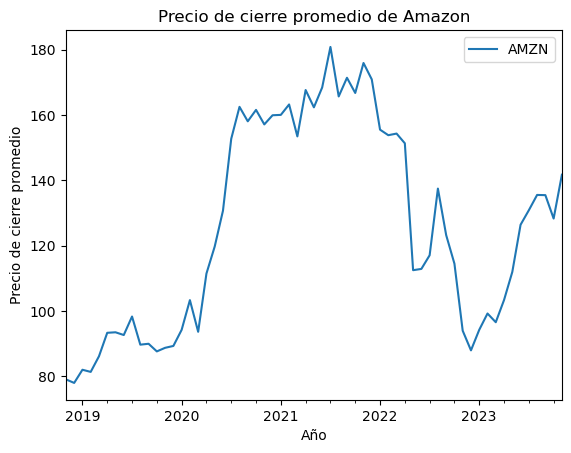

In [412]:
# Graficamos los datos históricos de cierre de Amazon
monthly_mean.plot(label='AMZN')

plt.title("Precio de cierre promedio de Amazon")
plt.xlabel("Año")
plt.ylabel("Precio de cierre promedio")
plt.legend()
plt.show()

In [413]:
# Convertimos los datos del dataframe de Apple
df = apple_df

# Convertimos la columna 'Date' a un tipo de dato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Establecemos la columna 'Date' como el índice del dataframe
df.set_index('Date', inplace=True)

# Remuestreamos los datos a un promedio mensual
monthly_mean = df['Close/Last'].resample('M').mean()

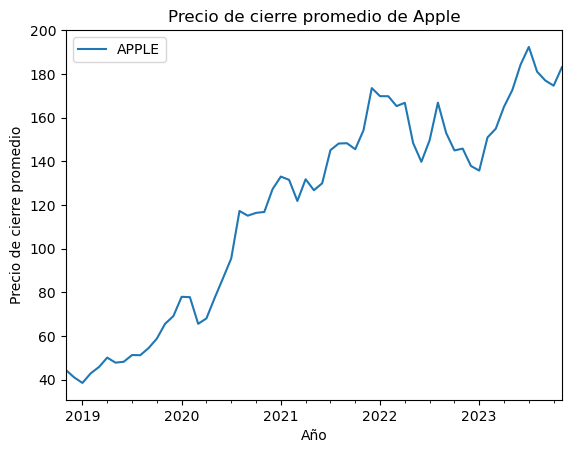

In [414]:
# Graficamos los datos históricos de cierre de Apple
monthly_mean.plot(label='APPLE')

plt.title("Precio de cierre promedio de Apple")
plt.xlabel("Año")
plt.ylabel("Precio de cierre promedio")
plt.legend()
plt.show()

In [415]:
# Convertimos los datos del dataframe de Cisco
df = csco_df

# Convertimos la columna 'Date' a un tipo de dato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Establecemos la columna 'Date' como el índice del dataframe
df.set_index('Date', inplace=True)

# Remuestreamos los datos a un promedio mensual
monthly_mean = df['Close/Last'].resample('M').mean()

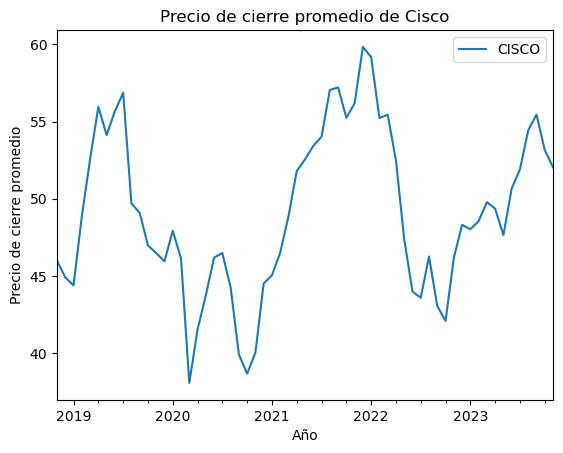

In [416]:
# Graficamos los datos históricos de cierre de Cisco
monthly_mean.plot(label='CISCO')

plt.title("Precio de cierre promedio de Cisco")
plt.xlabel("Año")
plt.ylabel("Precio de cierre promedio")
plt.legend()
plt.show()

In [417]:
# Convertimos los datos del dataframe de Meta
df = meta_df

# Convertimos la columna 'Date' a un tipo de dato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Establecemos la columna 'Date' como el índice del dataframe
df.set_index('Date', inplace=True)

# Remuestreamos los datos a un promedio mensual
monthly_mean = df['Close/Last'].resample('M').mean()


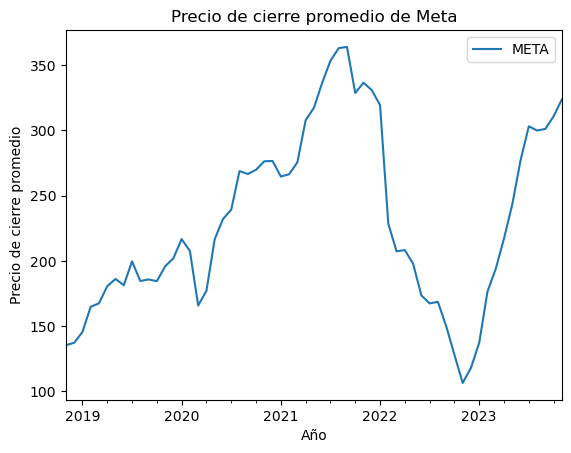

In [418]:
# Graficamos los datos históricos de cierre de Meta
monthly_mean.plot(label='META')

plt.title("Precio de cierre promedio de Meta")
plt.xlabel("Año")
plt.ylabel("Precio de cierre promedio")
plt.legend()
plt.show()

In [419]:
# Convertimos los datos del dataframe de Microsoft
df = msft_df

# Convertimos la columna 'Date' a un tipo de dato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Establecemos la columna 'Date' como el índice del dataframe
df.set_index('Date', inplace=True)

# Remuestreamos los datos a un promedio mensual
monthly_mean = df['Close/Last'].resample('M').mean()

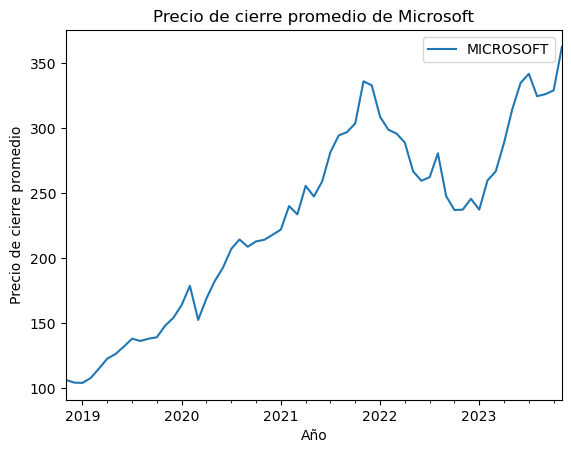

In [420]:
# Graficamos los datos históricos de cierre de Microsoft
monthly_mean.plot(label='MICROSOFT')

plt.title("Precio de cierre promedio de Microsoft")
plt.xlabel("Año")
plt.ylabel("Precio de cierre promedio")
plt.legend()
plt.show()

In [421]:
# Convertimos los datos del dataframe de Netflix
df = nflx_df

# Convertimos la columna 'Date' a un tipo de dato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Establecemos la columna 'Date' como el índice del dataframe
df.set_index('Date', inplace=True)

# Remuestreamos los datos a un promedio mensual
monthly_mean = df['Close/Last'].resample('M').mean()

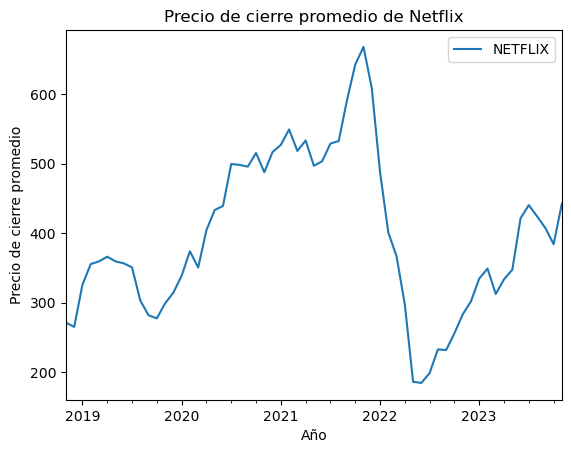

In [422]:
# Graficamos los datos históricos de cierre de Netflix
monthly_mean.plot(label='NETFLIX')

plt.title("Precio de cierre promedio de Netflix")
plt.xlabel("Año")
plt.ylabel("Precio de cierre promedio")
plt.legend()
plt.show()

In [423]:
# Convertimos los datos del dataframe de Qualcomm
df = qcom_df

# Convertimos la columna 'Date' a un tipo de dato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Establecemos la columna 'Date' como el índice del dataframe
df.set_index('Date', inplace=True)

# Remuestreamos los datos a un promedio mensual
monthly_mean = df['Close/Last'].resample('M').mean()

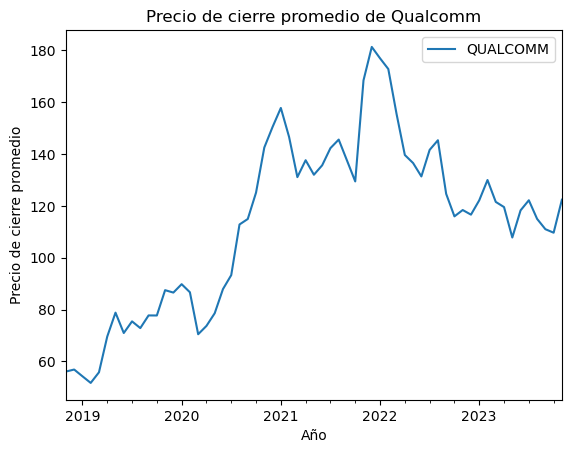

In [424]:
# Graficamos los datos históricos de cierre de Qualcomm
monthly_mean.plot(label='QUALCOMM')

plt.title("Precio de cierre promedio de Qualcomm")
plt.xlabel("Año")
plt.ylabel("Precio de cierre promedio")
plt.legend()
plt.show()

In [425]:
# Convertimos los datos del dataframe de Starbucks
df = sbux_df

# Convertimos la columna 'Date' a un tipo de dato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Establecemos la columna 'Date' como el índice del dataframe
df.set_index('Date', inplace=True)

# Remuestreamos los datos a un promedio mensual
monthly_mean = df['Close/Last'].resample('M').mean()

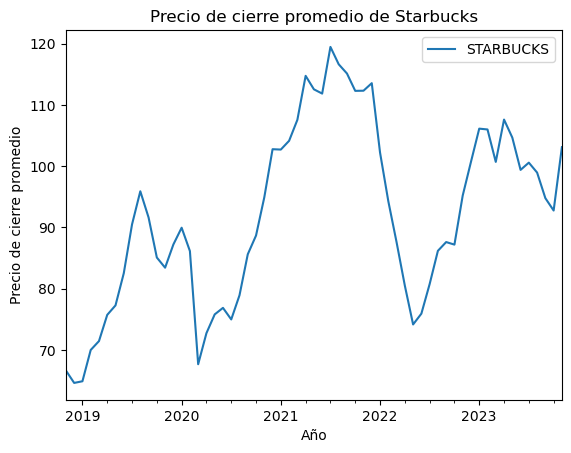

In [426]:
# Graficamos los datos históricos de cierre de Starbucks
monthly_mean.plot(label='STARBUCKS')

plt.title("Precio de cierre promedio de Starbucks")
plt.xlabel("Año")
plt.ylabel("Precio de cierre promedio")
plt.legend()
plt.show()

In [427]:
# Convertimos los datos del dataframe de Tesla
df = tsla_df

# Convertimos la columna 'Date' a un tipo de dato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Establecemos la columna 'Date' como el índice del dataframe
df.set_index('Date', inplace=True)

# Remuestreamos los datos a un promedio mensual
monthly_mean = df['Close/Last'].resample('M').mean()

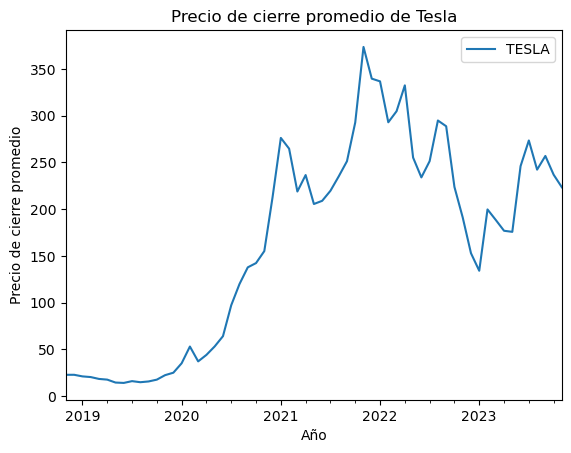

In [428]:
# Graficamos los datos históricos de cierre de Tesla
monthly_mean.plot(label='TESLA')

plt.title("Precio de cierre promedio de Tesla")
plt.xlabel("Año")
plt.ylabel("Precio de cierre promedio")
plt.legend()
plt.show()

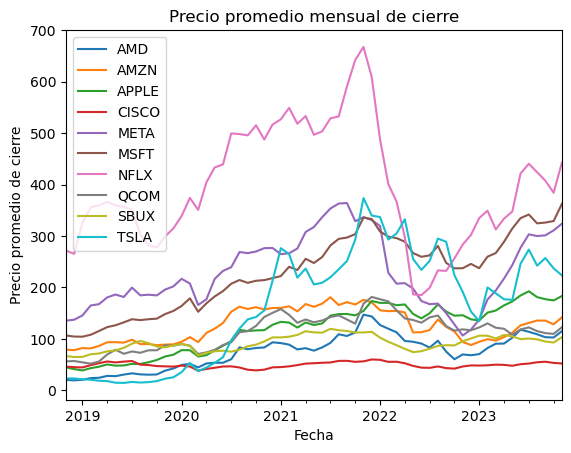

In [429]:
# Creación de lista con las copias de todos los dataframes.
dataframes1 = [amd_df1, amzn_df1, apple_df1, csco_df1, meta_df1, msft_df1, nflx_df1, qcom_df1, sbux_df1, tsla_df1]

for df, company in zip(dataframes1, companies):
    # Convert the date column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

    # Set the date column as the index
    df.set_index('Date', inplace=True)

    # Resample by month and calculate the mean
    monthly_mean = df['Close/Last'].resample('M').mean()

    # Plot the resampled dataframe
    monthly_mean.plot(label=company)

plt.title("Precio promedio mensual de cierre")    
plt.xlabel("Fecha")
plt.ylabel("Precio promedio de cierre")
plt.legend()
plt.show()

# Planteamiento y Optimizacion del Modelo
Para el plantemiento del problema, primero tenemos que transforma nuestros dataframes para cubrir el hecho de que se quiere hacer la predicción de forma mensual. Es decir, modificaremos todas nuestras tablas para que contengan información promediada de cada mes.

In [430]:
amd_df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2023-11-17,120.620,38538700,119.640,121.490,118.820
2023-11-16,119.830,49661870,117.200,120.726,116.410
2023-11-15,118.000,59555590,120.540,120.590,116.870
2023-11-14,119.880,61017450,119.700,122.110,119.220
2023-11-13,116.790,46741890,118.340,118.680,116.000


In [431]:

dataframes = [amd_df2, amzn_df2, apple_df2, csco_df2, meta_df2, msft_df2, nflx_df2, qcom_df2, sbux_df2, tsla_df2]

for df in dataframes:
    
    df['Date'] = pd.to_datetime(df['Date'])

    df.set_index('Date', inplace=True)

    monthly_mean_df = df.resample('M').mean()

    monthly_mean_df.reset_index(inplace=True)

    print(monthly_mean_df)

         Date  Close/Last        Volume    Open    High     Low
0  2018-11-30      20.181  92949036.667  20.056  20.756  19.289
1  2018-12-31      19.236 103854466.316  19.436  20.015  18.635
2  2019-01-31      20.335 109332880.476  20.097  20.846  19.586
3  2019-02-28      23.604  67893043.158  23.686  24.058  23.328
4  2019-03-31      24.254  70903989.524  24.276  24.846  23.714
..        ...         ...           ...     ...     ...     ...
56 2023-07-31     113.690  57101074.000 114.035 115.635 111.932
57 2023-08-31     108.819  68421308.696 109.174 111.398 106.585
58 2023-09-30     103.114  52226512.000 103.159 105.013 101.438
59 2023-10-31     102.556  52774302.273 102.487 104.331 100.727
60 2023-11-30     114.932  62247554.615 113.651 116.392 112.385

[61 rows x 6 columns]
         Date  Close/Last        Volume    Open    High     Low
0  2018-11-30      79.060 132756177.778  78.655  80.289  77.458
1  2018-12-31      77.972 161900975.789  78.646  80.095  76.399
2  2019-01-31    

Ahora realizaremos regresión para predecir los valores de los precios de las acciones para el siguiente mes. Primero importamos las librerias necesarias:

In [432]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [433]:
dataframes2 = [amd_df2, amzn_df2, apple_df2, csco_df2, meta_df2, msft_df2, nflx_df2, qcom_df2, sbux_df2, tsla_df2]

for df in dataframes2:
    #Extraccion de caracteristicas (X) y variable objetivo (y)
    X = pd.to_numeric(df.index.to_julian_date().values).reshape(-1, 1)  # Convert date to numerical format
    y = df['Close/Last'].values

    # Particion de los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creacion y entrenamiento del modelo
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Realización de predicciones
    predictions = model.predict(X_test)

    # Calculamos el error cuadrático medio como medida del rendimiento del modelo
    mse = mean_squared_error(y_test, predictions)
    print("Mean Squared Error for {}: {}".format(df.index.max(), mse))

    # Ahora, predigamos los precios para el siguiente mes
    next_month = pd.to_numeric((pd.to_datetime(df.index.max()) + pd.DateOffset(months=1)).to_julian_date()).reshape(-1, 1)
    predicted_price = model.predict(next_month)
    print("Predicted Price for Next Month for {}: {}".format(df.index.max(), predicted_price[0]))
    print("\n")

Mean Squared Error for 2023-11-17 00:00:00: 420.20729970184567
Predicted Price for Next Month for 2023-11-17 00:00:00: 121.42450117549743


Mean Squared Error for 2023-11-17 00:00:00: 897.6269995900163
Predicted Price for Next Month for 2023-11-17 00:00:00: 144.60630596541887


Mean Squared Error for 2023-11-17 00:00:00: 255.5208744441
Predicted Price for Next Month for 2023-11-17 00:00:00: 198.1363830753835


Mean Squared Error for 2023-11-17 00:00:00: 31.918205920906697
Predicted Price for Next Month for 2023-11-17 00:00:00: 50.86746008306909


Mean Squared Error for 2023-11-17 00:00:00: 4911.136369792693
Predicted Price for Next Month for 2023-11-17 00:00:00: 265.63696120156965


Mean Squared Error for 2023-11-17 00:00:00: 992.9368904952781
Predicted Price for Next Month for 2023-11-17 00:00:00: 346.60372867429396


Mean Squared Error for 2023-11-17 00:00:00: 13939.071717016917
Predicted Price for Next Month for 2023-11-17 00:00:00: 401.74114595575156


Mean Squared Error for 2023-1

Ahora imprimimos las librerias que necesitamos para solucionar el problema de programación lineal.

In [434]:
from scipy.optimize import linprog


In [435]:
dataframes2 = [amd_df2, amzn_df2, apple_df2, csco_df2, meta_df2, msft_df2, nflx_df2, qcom_df2, sbux_df2, tsla_df2]

# Lista para almacenar las desviaciones estándar
std_devs = []

for df in dataframes2:
    # Calculamos la desviación estándar y la agregamos a la lista
    std_dev = df['Close/Last'].std()
    std_devs.append(std_dev)

for i, std_dev in enumerate(std_devs):
    print("Standard Deviation for {}: {}".format(dataframes2[i].index.max(), std_dev))

# Modelo de optimización lineal
# Definimos los coeficientes para la función objetivo
c = [-predicted_price] * len(dataframes2)  # Negativo porque linprog minimiza, queremos maximizar

# Definicion de la matriz de restricciones de desigualdad
A = [
    std_devs,                  # Restreicciones para la volatilidad de las acciones
    [1] * len(dataframes2)     # Restricción para la asignación de presupuesto
]

#  Definición del vector de restricciones de igualdad (para la suma de pesos)
A_eq = [[1] * len(dataframes2)]  #  Restricción para la suma de pesos sea igual a 1

#  Definición del vector de restricciones de desigualdad
b = [85, 10000]

#  Definimos el vector de restricciones de igualdad
b_eq = [1]

# Se definen los límites de las variables de decisión (pesos) 
x_bounds = (0, 0.25)

# Solución del modelo de optimización lineal
result = linprog(c, A_ub=A, b_ub=b, A_eq=A_eq, b_eq=b_eq, bounds=[x_bounds] * len(dataframes2), method='highs')

# Mostrar el resultado
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print("\nLinear Optimization Result:")
print(result)

Standard Deviation for 2023-11-17 00:00:00: 33.03947220905847
Standard Deviation for 2023-11-17 00:00:00: 31.876680624575556
Standard Deviation for 2023-11-17 00:00:00: 46.79297233170064
Standard Deviation for 2023-11-17 00:00:00: 5.538073576081013
Standard Deviation for 2023-11-17 00:00:00: 69.14206356616283
Standard Deviation for 2023-11-17 00:00:00: 71.86197355636942
Standard Deviation for 2023-11-17 00:00:00: 116.2339315069413
Standard Deviation for 2023-11-17 00:00:00: 33.232168678029026
Standard Deviation for 2023-11-17 00:00:00: 14.855892663824294
Standard Deviation for 2023-11-17 00:00:00: 109.86280219725778

Linear Optimization Result:
        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -315.8462223581737
              x: [ 0.000e+00  0.000e+00  0.000e+00  2.500e-01  2.500e-01
                   0.000e+00  0.000e+00  0.000e+00  2.500e-01  2.500e-01]
            nit: 3
          lower:  resid